# Web Scraping in Python

Please make sure you signed in.

## Introduction

Web Scraping is a very useful method used by data scientists to gather data from websites. This workshop will introduce the basics of web scraping and review common web scraping methodologies. Although there are many different ways to scrape data from websites we will cover some o the most popularly used libraries that python has to offer

## How to stay out of jail

Web Scraping is one of those legal gray areas (sadly). Make sure the site you are scraping is public domain, other wise make sure you have approval from the site's owner. Even with public domain be careful as sometimes your web scrape can overlook a site's terms of agreement. 

Ex.) LinkedIn vs. Doe Defendants. LinkedIn is suing 100 anonymous users for the following violations:

-Computer Fraud and Abuse Act (CFAA)

-California Penal Code

-Digital Millennium Copyright Act (DMCA)


A lot of web scraping/crawling rules will be listed in a sites robots.txt file which I will show you how to access. One example of restricion would be the crawl rate which tell you how many request you can per minute. This is to keep your crawl from overloading the server (simply add a delay of 10 sec between requests in code)

## HTML Basics Review

HTML stands for Hypertext Markup Language. 

It is used to describe the structure of web pages. It uses HTML elements that are represented by tags. This are a few of the HTML elements that are available but there are many more that can be used. Familiarity with different tags and thier functions are good know, but it is not as important as knowing the structure of HTML.

The following is an example of the HTML code structure:

In [ ]:
#   <!DOCTYPE html>
#   <html>
#      <head>
#          <title>Page Title</title>
#      </head>
#      <body>
#         <h1>My First Heading</h1>
#         <p>My first paragraph.</p>
#         <input type="button" onclick="location.href='http://google.com'" value="Go to Google">
#      </body>
#   </html>

## Import Modules

Here there are two important libraries we will be using. BeautifulSoup allows us to work with HTML easily. The second is requests which we will use to gather the HTML from the website of our choice.

In [1]:
    # importing the BeautifulSoup: Helps parse and "beautify" HTML 
                      # importing the urlopen: Helps make web client to sites.

If you get an error when running this block, you may not have the bs4 library installed. To do this open up Anaconda Prompt (or Terminal if on Mac) and type <code>pip install beautifulsoup4</code>

## Making a Request

This is how to make a request and download the HTML from the website. We will be using Wikipedia for our example as it is a fairly easy site to scrape from. Lets use the machine learning wiki at: https://en.wikipedia.org/wiki/Machine_learning

In [1]:
# the .text attribute shows the text stores in this req object.

## Basics of BeatifulSoup4 

So we now have a variable 'results' that basically spits out the HTML from this website. This is kind of daunting and unhelpful but luckily we can use BeautifulSoup for this. This library is essentially an HTML "beautifier" that makes working with HTML bearable.

Now lets convert our object to type requests to one of type bs4.

### Select

We can select certain tags from HTML. Helpful to use the HTML inspector in a web browser like Chrome or Safari. In this case let's select all the headers on the page so we can see the different topics that the wiki page contains. Select will pull all the items given the tag and put them into an array.

In [2]:
# Selecting all the headlines
# print(type(soup.select(".mw-headline")[0]))

In [3]:
# List all the titles in readable format


## Web Scraping for Real

Now that we have the basics, lets try web scraping a real site! With permission of course. Lets use this website we are allowed to scrape. Here is the link: http://books.toscrape.com/catalogue/category/books_1/index.html

**Lets get all the product information we can. Seems like each item is separated into a "product_pod"**

**Scraping titles**

**Scraping prices**

**Scraping availability**

### Scraping multiple pages

Sadly there isn't really an easy function to do this. Atleast none that I have seen

In [25]:
# We can't easily include the first page in the link becasue it has "index.html" rather than the regular file

# Loops through a formatted url string. Will take a while to run

for page in range(2,51):
    url = 'http://books.toscrape.com/catalogue/category/books_1/page-'+str(page)+'.html'
    results = req.get(url)
    soup = bs(results.text, 'lxml')
    titles.extend([x.text for x in soup.find_all('h3')])
    price.extend([x.text[2:] for x in soup.find_all('p', attrs = {'class': 'price_color'})])
    instock.extend([x.text[15:23] for x in soup.find_all('p', attrs = {'class': 'instock availability'})])


### Creating your data

Now that we have retrieved our data lets create our dataframe and do some cleaning

In [4]:
# Remember that the prices were store as Strings


In [5]:
# Lets clean this real quick


### Visualization

Lets make a boxplot of all the prices to check for outliers

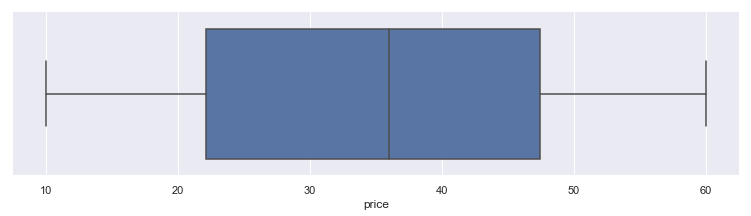

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'darkgrid', color_codes = True)
f, ax = plt.subplots(figsize=(13, 3))
sns.despine(f, left=True, bottom=True)

boxplt = sns.boxplot(books['price'])

AxesSubplot(0.125,0.11;0.775x0.77)


## Thank You for Coming!

Visit us at https://www.dsiufl.org